sampling rate 44100


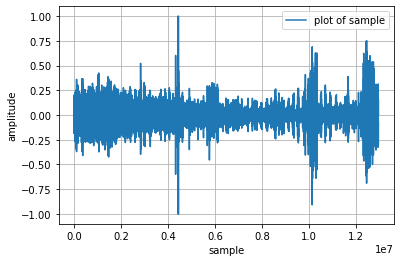

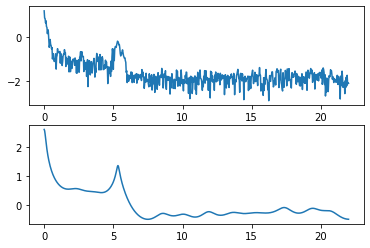

In [4]:


import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import scipy
from scipy.signal import find_peaks

d,fs=sf.read("should2.wav")
print('sampling rate', fs)
ln = len(d)
n=np.linspace(0,ln-1,ln)
plt.figure(1)
plt.plot(n,d)
plt.legend(['plot of sample'])
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.grid()

def enframe(x, winsize, hoplength, fs, wintype):
    hpln = int(fs*hoplength*0.001)
    wnsz =int(fs*winsize*0.001)
    temp=wnsz -(len(x)%hpln)
    z =np.pad(x,(0,temp),'constant')
    if wintype == 'hamm':
        win =np.hamming(wnsz)
    elif wintype=='rect':
        win=np.ones(wnsz)
    frame =[]
    l =len(x)
    for i in range(0,l,hpln):
        a=z[i:i+wnsz]*win
        frame.append(a)
    return(frame)

windowdata = enframe(d, 30 ,15 ,fs, 'hamm')   
F=[]
X=[]
f=fs/1000

## Spectrum of one frame
for i in  windowdata:
    b=np.log10(np.abs(np.fft.fft(i)))
    n1=np.linspace(0,len(b)-1, len(b))
    b=b[0:len(b)//2]
    freq=n1*(f/len(n1))
    freq=freq[0:len(freq)//2]
    X.append(b)
    F.append(freq)
    
  

s=0
xs=windowdata[0]
a=librosa.lpc(xs,30)
w,h=scipy.signal.freqz([1],a, 661)
plt.figure(2)
plt.subplot(2,1,1)
plt.plot(F[s],X[s])
z=np.log10(np.abs(h))
plt.subplot(2,1,2)
plt.plot(F[s],z)


